<h1>CTA: Personality Type Data Analysis</h1>
Inspired by Myers-Briggs, I developed a 10-question survey to better understand my colleagues' personalities. Despite its brevity, I used feature engineering to uncover deeper insights into their personality type. Below, I outline the steps I took to analyse the results from the survey:

<h2> Importing the dataset </h2>

In [3]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd  # Importing pandas for data handling and analysis, aliasing as 'pd'
import matplotlib.pyplot as plt  # Importing matplotlib for plotting and visualisations, aliasing as 'plt'
#%matplotlib inline  # Ensures that matplotlib plots are displayed inline in Jupyter notebooks

# Define the path to the CSV file containing the personality form data
path = 'Personality Quiz - Tinu .csv'

# Load the data from the CSV file into a pandas DataFrame for further analysis
personality_data = pd.read_csv(path)

personality_data.head(10) # Print the first 10 rows of the dataset 

,Timestamp,What is your name?,1. I enjoy meeting new people and making new friends,2. I prefer to plan things in advance rather than being spontaneous\n,3. I often rely on my intuition when making decisions,4. I find it easy to empathize with others’ feelings,5. I enjoy working in a team rather than working alone,6. I feel more productive when I have a clear structure,"7. I like to try new things, even if they are outside my comfort zone",8. I usually think logically before making a choice,9. I enjoy discussing abstract ideas more than concrete facts,10. I feel energised after spending time with others
0,2024/10/17 1:58:12 PM GMT+1,Olly,3,5,3,3,2,4,4,4,5,5
1,2024/10/17 2:00:15 PM GMT+1,ferg,5,2,5,4,4,4,5,5,3,5
2,2024/10/17 2:03:02 PM GMT+1,bennnnnnnnn,4,2,4,5,4,4,5,4,5,3
3,2024/10/17 2:03:03 PM GMT+1,Mona,4,2,4,4,4,5,4,4,5,4
4,2024/10/17 2:03:16 PM GMT+1,Bami,4,4,5,5,3,5,5,5,4,2
5,2024/10/17 2:03:27 PM GMT+1,zia,4,4,4,4,5,5,5,3,4,3
6,2024/10/17 2:07:26 PM GMT+1,Proud,5,3,5,2,3,3,5,5,4,3
7,2024/10/17 2:09:26 PM GMT+1,Alyasi,4,2,4,4,4,4,4,4,2,3
8,2024/10/17 2:12:45 PM GMT+1,NaN,3,4,5,1,3,4,3,3,5,3
9,2024/10/17 2:15:52 PM GMT+1,Charlotte,5,4,5,5,5,3,5,4,5,4


<h3>Data Cleansing</h3>
After importing the data set, I removed the unnecessary 'Timestamp' column from the dataset. Then, I renamed all the columns to more meaningful labels, such as 'Name' and 'Q1' through 'Q10', to improve clarity. Finally, I replaced any missing values (NaN) in the 'Name' column with 'Anonymous' to ensure consistency in the data.

In [4]:
# Remove the unneccesary timestamp column 
cleansed_data = personality_data.drop('Timestamp', axis=1)

# Changing the names of all the columns to better names
cleansed_data.columns = ['Name', 'Q1', 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'] 

# Capitalise each persons name
cleansed_data['Name'] = cleansed_data['Name'].str.capitalize()

# Changing the blank(NaN) names in the Name column to 'Anonymous'
cleansed_data['Name']= cleansed_data['Name'].fillna('Anonymous')
print(cleansed_data)

           Name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10
0          Olly   3   5   3   3   2   4   4   4   5    5
1          Ferg   5   2   5   4   4   4   5   5   3    5
2   Bennnnnnnnn   4   2   4   5   4   4   5   4   5    3
3          Mona   4   2   4   4   4   5   4   4   5    4
4          Bami   4   4   5   5   3   5   5   5   4    2
5           Zia   4   4   4   4   5   5   5   3   4    3
6         Proud   5   3   5   2   3   3   5   5   4    3
7        Alyasi   4   2   4   4   4   4   4   4   2    3
8     Anonymous   3   4   5   1   3   4   3   3   5    3
9     Charlotte   5   4   5   5   5   3   5   4   5    4
10        Homan   4   3   3   3   3   4   4   4   3    3
11       Guoxin   4   2   2   5   4   5   4   3   5    3
12    Anonymous   4   4   4   5   3   5   4   5   4    4
13         Zade   4   3   4   4   3   4   5   3   4    4
14     Soe-myat   3   4   4   4   2   4   3   3   4    3
15        Tinu    3   4   4   5   3   5   4   4   2    1
16      Michael   4   3   5   4

<h3> Feature engineering</h3>
I then used the data from the questions to identify each participants Myers Briggs Personality Type. A For loop was the created to append the current data frame with the identified personality type. These scores were then compared using a function to find each persons Personality Type.


In [5]:
# Creating a new column to indetify each persons 
personality_traits = {
    'extraversion': cleansed_data.Q1 + cleansed_data.Q2 + cleansed_data.Q3,
    'introversion': cleansed_data.Q2 + cleansed_data.Q6 + cleansed_data.Q8,
    'sensing': cleansed_data.Q2 + cleansed_data.Q6 + cleansed_data.Q4,
    'intuition': cleansed_data.Q3 + cleansed_data.Q7 + cleansed_data.Q9,
    'thinking': cleansed_data.Q8 + cleansed_data.Q4,
    'feeling': cleansed_data.Q4 + cleansed_data.Q5,
    'judging': cleansed_data.Q2 + cleansed_data.Q6,
    'perceiving': cleansed_data.Q7 + cleansed_data.Q3
}

# Add each personality trait score as a new column in the cleansed_data DataFrame
for trait, score in personality_traits.items():
    cleansed_data[trait] = score

# Display the updated DataFrame
print(cleansed_data.head())

          Name  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  extraversion  \
0         Olly   3   5   3   3   2   4   4   4   5    5            11   
1         Ferg   5   2   5   4   4   4   5   5   3    5            12   
2  Bennnnnnnnn   4   2   4   5   4   4   5   4   5    3            10   
3         Mona   4   2   4   4   4   5   4   4   5    4            10   
4         Bami   4   4   5   5   3   5   5   5   4    2            13   

   introversion  sensing  intuition  thinking  feeling  judging  perceiving  
0            13       12         12         7        5        9           7  
1            11       10         13         9        8        6          10  
2            10       11         14         9        9        6           9  
3            11       11         13         8        8        7           8  
4            14       14         14        10        8        9          10  


In [6]:
def personality_code(row):
    # Initialize code variables
    code_1 = ''
    code_2 = ''
    code_3 = ''
    code_4 = ''

    # Determine the first letter based on extraversion and introversion
    if row['extraversion'] > row['introversion']:
        code_1 = 'E.'
    elif row['extraversion'] < row['introversion']:
        code_1 = 'I.'
    else:
        code_1 = 'E/I.'

    # Determine the second letter based on sensing and intuition
    if row['sensing'] > row['intuition']:
        code_2 = 'S.'
    elif row['sensing'] < row['intuition']:
        code_2 = 'N.'
    else:
        code_2 = 'S/N.'

    # Determine the third letter based on thinking and feeling
    if row['thinking'] > row['feeling']:
        code_3 = 'T.'
    elif row['thinking'] < row['feeling']:
        code_3 = 'F.'
    else:
        code_3 = 'T/F.'

    # Determine the fourth letter based on judging and perceiving
    if row['judging'] > row['perceiving']:  # Fixed spelling here
        code_4 = 'J'
    elif row['judging'] < row['perceiving']:  # Fixed spelling here
        code_4 = 'P'
    else:
        code_4 = 'J/P'

    return code_1+ code_2 + code_3 + code_4

# Apply the function to each row
cleansed_data['Type'] = cleansed_data.apply(personality_code, axis=1)
cleansed_data.head(20)  # Print the first 20 rows of the cleansed_data data set

,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,extraversion,introversion,sensing,intuition,thinking,feeling,judging,perceiving,Type
0,Olly,3,5,3,3,2,4,4,4,5,5,11,13,12,12,7,5,9,7,I.S/N.T.J
1,Ferg,5,2,5,4,4,4,5,5,3,5,12,11,10,13,9,8,6,10,E.N.T.P
2,Bennnnnnnnn,4,2,4,5,4,4,5,4,5,3,10,10,11,14,9,9,6,9,E/I.N.T/F.P
3,Mona,4,2,4,4,4,5,4,4,5,4,10,11,11,13,8,8,7,8,I.N.T/F.P
4,Bami,4,4,5,5,3,5,5,5,4,2,13,14,14,14,10,8,9,10,I.S/N.T.P
5,Zia,4,4,4,4,5,5,5,3,4,3,12,12,13,13,7,9,9,9,E/I.S/N.F.J/P
6,Proud,5,3,5,2,3,3,5,5,4,3,13,11,8,14,7,5,6,10,E.N.T.P
7,Alyasi,4,2,4,4,4,4,4,4,2,3,10,10,10,10,8,8,6,8,E/I.S/N.T/F.P
8,Anonymous,3,4,5,1,3,4,3,3,5,3,12,11,9,13,4,4,8,8,E.N.T/F.J/P
9,Charlotte,5,4,5,5,5,3,5,4,5,4,14,11,12,15,9,10,7,10,E.N.F.P


<h2>Visualising the Data</h2>
Once the I had all the relevant data points, I was then able to visulaise the results:

The most common personality type in CTA is I.S.T.J


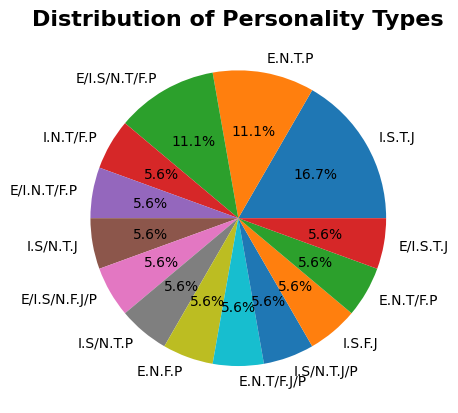

In [5]:
# Count the amount of each personality type in the data set
personality_counts = cleansed_data.Type.value_counts()
#Plot a pie chart for the findings
plt.pie(personality_counts, labels=personality_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Personality Types', fontsize=16, fontweight='bold', color='black')
#Present the Pie Chart
plt.show

most_common_type = personality_counts.idxmax()  # Finds the label of the index that was found to have the highest value

print(f'The most common personality type in CTA is {most_common_type}')

<h2>Main Analysis</h2>

In [6]:
# Finding the max within each of the personality type columns  
relevant_columns = cleansed_data.loc[:, 'extraversion':'perceiving'] # All the rows with the relevant columns extracted

for column in relevant_columns:
    max_value = cleansed_data[column].max() # Find the maximum value within the column
    max_indices = cleansed_data[cleansed_data[column] == max_value].index    # Get all the indices where the value equals the maximum value
    max_names = cleansed_data.loc[max_indices, 'Name'].tolist()    # Get the names of all who hit the max value
    # Assuming max_names is the list of names with the highest value
    
    if len(max_names) > 1:  # If more than one person has the highest score
        output = ', '.join(max_names[:-1])  + ' and ' + max_names[-1] # : -1 is Exclusive of the final value so the final value has ot be added on
    else:  # If there's only one name just make the output the name
        output = max_names[0]
    
    # Use the properly formatted output string in the print statement
    print(f"The person/people with the highest {column} score was/were {output}")

The person/people with the highest extraversion score was/were Charlotte
The person/people with the highest introversion score was/were Bami and Anonymous
The person/people with the highest sensing score was/were Bami, Anonymous and Tinu 
The person/people with the highest intuition score was/were Charlotte
The person/people with the highest thinking score was/were Bami and Anonymous
The person/people with the highest feeling score was/were Charlotte
The person/people with the highest judging score was/were Olly, Bami, Zia, Anonymous and Tinu 
The person/people with the highest perceiving score was/were Ferg, Bami, Proud and Charlotte


<h1>Additional Findings</h1>
After the main analysis I considered if there was any additional data points I could find. I then calculated each persons:
    <ul>
        <li>Risk Taking: (Score from questions about trying new things) - (Score from questions about planning and structure) 
            <ul>
            <li>Risk-Taking Score = Q7 - (Q2 + Q6)</li>
            </ul>
            </li>
        <li>Energy Level Score: (Score from questions on socializing) - (Score from questions on needing alone time)
        <ul>
            <li>Energy Level Score = Q1 + Q5 </li>
            </ul>
        </li>
        <li>Decision Making Balance: (Thinking Score + Sensing Score) - (Feeling Score + Intuition Score)
        <ul>
            <li>Decision-Making Balance = (Q8 + [Sensing Score]) - (Q4 + Q3 + Q9)</li>
            </ul>
        </li>
    </ul>


In [7]:
cleansed_data['Risk Taking'] = cleansed_data.Q7 - (cleansed_data.Q2 + cleansed_data.Q6) # Combining relevant risk taking responses
cleansed_data['Energy Level'] = cleansed_data.Q1 + cleansed_data.Q5 # Combining relevant energy level responses
cleansed_data['Decision Making Balance'] = (cleansed_data.Q8 + cleansed_data.sensing) - (cleansed_data.Q4 + cleansed_data.Q3+ cleansed_data.Q9)
cleansed_data.head(20)

,Name,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,sensing,intuition,thinking,feeling,judging,perceiving,Type,Risk Taking,Energy Level,Decision Making Balance
0,Olly,3,5,3,3,2,4,4,4,5,...,12,12,7,5,9,7,I.S/N.T.J,-5,5,5
1,Ferg,5,2,5,4,4,4,5,5,3,...,10,13,9,8,6,10,E.N.T.P,-1,9,3
2,Bennnnnnnnn,4,2,4,5,4,4,5,4,5,...,11,14,9,9,6,9,E/I.N.T/F.P,-1,8,1
3,Mona,4,2,4,4,4,5,4,4,5,...,11,13,8,8,7,8,I.N.T/F.P,-3,8,2
4,Bami,4,4,5,5,3,5,5,5,4,...,14,14,10,8,9,10,I.S/N.T.P,-4,7,5
5,Zia,4,4,4,4,5,5,5,3,4,...,13,13,7,9,9,9,E/I.S/N.F.J/P,-4,9,4
6,Proud,5,3,5,2,3,3,5,5,4,...,8,14,7,5,6,10,E.N.T.P,-1,8,2
7,Alyasi,4,2,4,4,4,4,4,4,2,...,10,10,8,8,6,8,E/I.S/N.T/F.P,-2,8,4
8,Anonymous,3,4,5,1,3,4,3,3,5,...,9,13,4,4,8,8,E.N.T/F.J/P,-5,6,1
9,Charlotte,5,4,5,5,5,3,5,4,5,...,12,15,9,10,7,10,E.N.F.P,-2,10,1


In [8]:
# Finding the max within each of the personality type columns  
relevant_additions = cleansed_data.loc[:, 'Risk Taking':'Decision Making Balance'] # All the rows with the relevant columns extracted

for column in relevant_additions:
    max_value = cleansed_data[column].max() # Find the maximum value within the column
    max_indices = cleansed_data[cleansed_data[column] == max_value].index    # Get all the indices where the value equals the maximum value
    max_names = cleansed_data.loc[max_indices, 'Name'].tolist()    # Get the names of all who hit the max value
    # Assuming max_names is the list of names with the highest value
    
    if len(max_names) > 1:  # If more than one person has the highest score
        output = ', '.join(max_names[:-1])  + ' and ' + max_names[-1] # : -1 is Exclusive of the final value so the final value has ot be added on
    else:  # If there's only one name just make the output the name
        output = max_names[0]
    
    # Use the properly formatted output string in the print statement
    print(f"The person/people with the highest {column} score was {output}")


The person/people with the highest Risk Taking score was Ferg, Bennnnnnnnn and Proud
The person/people with the highest Energy Level score was Charlotte
The person/people with the highest Decision Making Balance score was Tinu 
